### 🏆 Product Matching in a Pharmaceutical Marketplace

#### 🔍 Problem Statement  
Develop a **product matching system** that accurately matches pharmaceutical products across different sellers by analyzing product names and key attributes.  

The system must:  
- Extract key features such as **product name, dosage form, concentration, and price**.  
- Handle **variations in naming conventions, abbreviations, and minor spelling errors**.  
- Assign the correct **SKU** from a **master file** to each seller’s product.  
- Compute a **similarity score (0-1 or 0%-100%)** to indicate how closely two product names match.  
- Ensure execution is **optimized for CPU** and runs within **500ms per comparison**.  
- Maintain an accuracy of **at least 90%**.  


In [7]:
import pandas as pd

# Load dataset
sheet = pd.ExcelFile("Product Matching Dataset.xlsx")
master = sheet.parse(sheet.sheet_names[0])
data = sheet.parse(sheet.sheet_names[1])

# Discover data
print("Master Data Info:")
print(master.info())
print("\nMaster Data Summary:")
print(master.describe())
print("\nMaster Data Sample:")
print(master.head())


Master Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sku              1000 non-null   int64  
 1   product_name     1000 non-null   object 
 2   product_name_ar  1000 non-null   object 
 3   price            1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB
None

Master Data Summary:
                sku        price
count   1000.000000  1000.000000
mean    2027.865000   167.039850
std     2842.103327   348.854691
min        2.000000     7.000000
25%      390.500000    46.000000
50%     1001.500000    88.250000
75%     2152.750000   164.250000
max    14384.000000  5174.000000

Master Data Sample:
    sku                    product_name                product_name_ar  price
0   279          ANAFRONIL 75 MG 20 TAB  انافرونيل 75 مجم اس ار 20 قرص   75.0
1  2282         LOPRECOUGH SYRUP 100 

In [8]:
print("\nData Info:")
print(data.info())
print("\nData Summary:")
print(data.describe())
print("\nData Sample:")
print(data.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83562 entries, 0 to 83561
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sku                          83562 non-null  int64  
 1   marketplace_product_name_ar  83562 non-null  object 
 2   seller_item_name             83562 non-null  object 
 3   price                        83562 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ MB
None

Data Summary:
                sku         price
count  83562.000000  83562.000000
mean    1600.653204     79.055458
std     1469.206223     62.818117
min        4.000000      7.000000
25%      476.000000     38.000000
50%     1312.000000     61.500000
75%     2258.000000    100.500000
max     9532.000000    406.000000

Data Sample:
    sku marketplace_product_name_ar       seller_item_name  price
0  1322    استوهالت 40 مجم 14 كبسول  ESTOHALT 40 MG 14 CAP   56.

### 📊 Data Overview

#### 📌 Master File (Reference Data)
- **Total Entries:** 1,000  
- **Columns:**  
  - `sku` → Unique product identifier  
  - `product_name` → Product name (English)  
  - `product_name_ar` → Product name (Arabic)  
  - `price` → Product price  
- **Missing Values:** ❌ None  
---

#### 📌 Dataset (Products to Match)
- **Total Entries:** 83,562  
- **Columns:**  
  - `sku` → SKU (already labeled, likely for validation)  
  - `marketplace_product_name_ar` → Product name in Arabic (Marketplace)  
  - `seller_item_name` → Product name provided by the seller  
  - `price` → Seller’s price  
- **Missing Values:** ❌ None  
---

##### 🔍 Key Observations
✔ The **Dataset** is significantly larger than the **Master File**, meaning each product in the Master File likely has multiple variations in the Dataset.  
✔ No missing values, so we can directly proceed with **text normalization and similarity feature extraction**.  


Basic Statistics:
                sku         price
count  83562.000000  83562.000000
mean    1600.653204     79.055458
std     1469.206223     62.818117
min        4.000000      7.000000
25%      476.000000     38.000000
50%     1312.000000     61.500000
75%     2258.000000    100.500000
max     9532.000000    406.000000

Number of unique SKUs: 500
Number of unique product names: 49556

Price Distribution:
price
39.0    2183
60.0    1844
50.0    1340
26.0    1340
76.0    1337
Name: count, dtype: int64

Missing Values:
sku                            0
marketplace_product_name_ar    0
seller_item_name               0
price                          0
clean_name                     0
dtype: int64


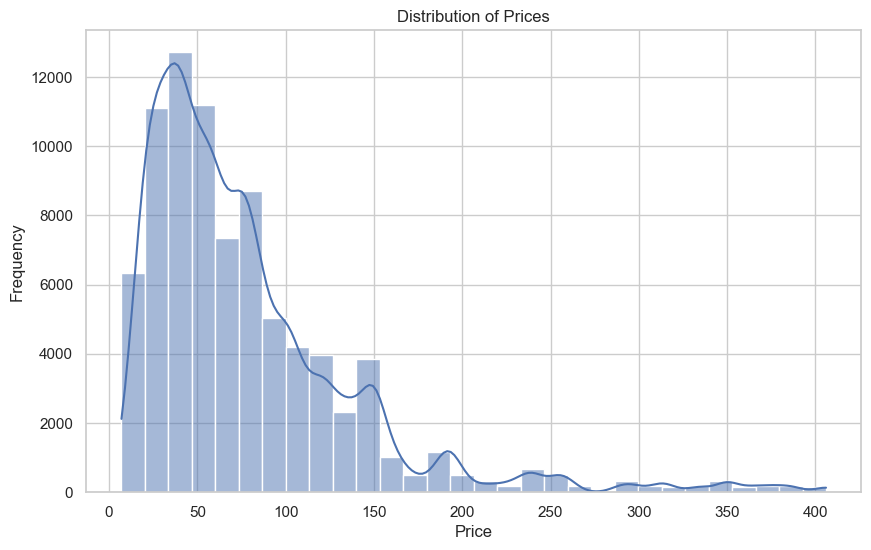

C:\Users\RTX\AppData\Local\Temp\ipykernel_17240\2430379696.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names.values, y=top_names.index, palette="viridis")


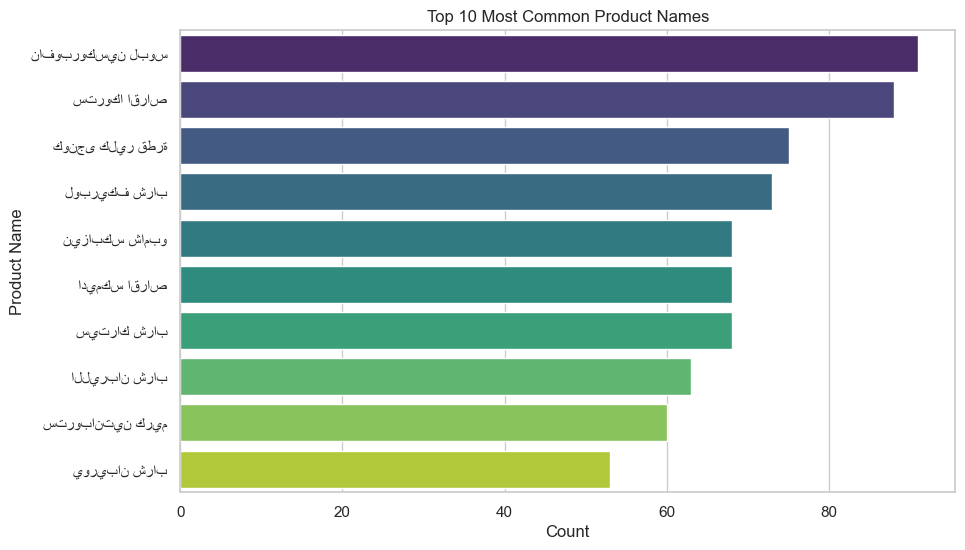

Final cleaned data saved successfully!


In [4]:
# Required Libraries
import pandas as pd
import re
from num2words import num2words
import matplotlib.pyplot as plt
import seaborn as sns


# 1-Analyze Data
def analyze_data(data):
    """
    Perform exploratory data analysis (EDA).
    - Print basic statistics.
    - Count unique SKUs and product names.
    - Check for missing values.
    - Visualize price distribution and common product names.
    """
    print("Basic Statistics:")
    print(data.describe())

    unique_skus = data['sku'].nunique()
    print(f"\nNumber of unique SKUs: {unique_skus}")

    unique_names = data['seller_item_name'].nunique()
    print(f"Number of unique product names: {unique_names}")

    print("\nPrice Distribution:")
    print(data['price'].value_counts().head())

    print("\nMissing Values:")
    print(data.isnull().sum())

    # Visualization
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(data['price'], bins=30, kde=True)
    plt.title("Distribution of Prices")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

    top_names = data['seller_item_name'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_names.values, y=top_names.index, palette="viridis")
    plt.title("Top 10 Most Common Product Names")
    plt.xlabel("Count")
    plt.ylabel("Product Name")
    plt.show()

# 2-Clean and Prepare Data
def clean_and_prepare_data(master, data):
    """
    Data cleaning and preprocessing.
    - Convert text to lowercase.
    - Remove special characters.
    - Convert numbers to words.
    - Expand abbreviations.
    - Generate incremental input values.
    - Merge cleaned data from both datasets.
    """
    def clean_text(text):
        text = str(text).lower()
        text = re.sub(r'[^a-z؀-ۿ0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        text = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), text)
        text = text.replace("مجم", "ميليجرام").replace("مل", "ميليلتر")
        return text

    master['clean_name'] = master['product_name_ar'].apply(clean_text)
    data['clean_name'] = data['seller_item_name'].apply(clean_text)

    new = pd.DataFrame(columns=['sku', 'name', 'price', 'input'])
    new['sku'] = pd.concat([master['sku'], master['sku']], ignore_index=True)
    new['name'] = pd.concat([master['product_name'], master['product_name_ar']], ignore_index=True)
    new['price'] = pd.concat([master['price'], master['price']], ignore_index=True)

    expanded_rows = []
    for _, row in new.iterrows():
        words = row['name'].split()
        for i in range(1, len(words) + 1):
            expanded_rows.append({
                'sku': row['sku'],
                'name': row['name'],
                'price': row['price'],
                'input': ' '.join(words[:i])
            })

    y = pd.DataFrame(expanded_rows)
    data = data.rename(columns={
        "sku": "sku",
        "seller_item_name": "input",
        "price": "price",
        "marketplace_product_name_ar": "name"
    })
    merged_data = data[['sku', 'name', 'price', 'input']]
    maybe_final = pd.concat([y, merged_data], ignore_index=True)
    clean_data = maybe_final.drop_duplicates()
    return clean_data

# 3-Save Cleaned Data
def save_cleaned_data(clean_data):
    """
    Save the cleaned dataset to an Excel file.
    """
    clean_data.to_excel("Clean_data.xlsx", index=False)
    print("Final cleaned data saved successfully!")

# Main Function
def main():
    analyze_data(data)
    clean_data = clean_and_prepare_data(master, data)
    save_cleaned_data(clean_data)

# Run
if __name__ == "__main__":
    main()


🎯 Accuracy: 93.91%
🎯 F1-Score: 94.44%
📊 Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.91      0.95        34
           5       0.97      0.97      0.97        33
           9       1.00      0.85      0.92        34
          10       1.00      0.97      0.98        32
          14       0.85      0.91      0.88        32
          15       0.96      0.96      0.96        24
          20       0.94      0.97      0.96        34
          22       1.00      0.95      0.97        37
          26       0.91      0.89      0.90        35
          28       1.00      1.00      1.00        41
          30       0.97      1.00      0.98        31
          34       1.00      0.96      0.98        23
          36       0.97      0.88      0.92        32
          45       1.00      0.97      0.99        34
          46       1.00      0.94      0.97        36
          48       1.00      0.92      0.96        25
          52     

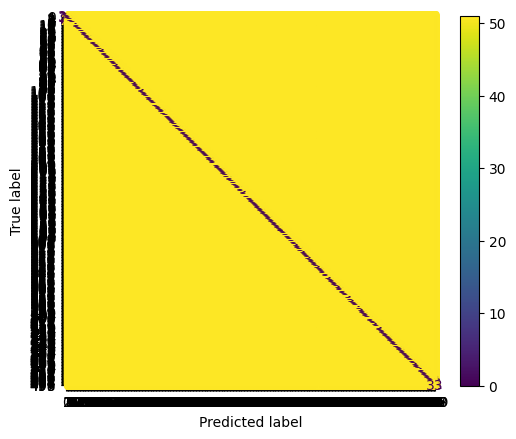

In [1]:
# Required Libraries
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import re
from num2words import num2words
import numpy as np

# 🟢 1️⃣ Load Data
file_path = "Product Matching Dataset.xlsx"
xls = pd.ExcelFile(file_path)
master_df = pd.read_excel(xls, sheet_name="Master File")
dataset_df = pd.read_excel(xls, sheet_name="Dataset")

# 🟢 2️⃣ Optimized Data Cleaning & Preprocessing
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z؀-ۿ0-9\s]', '', text)  # Remove special characters (Arabic supported)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), text)  # Convert numbers to words
    # Expand common abbreviations (customize as needed)
    text = text.replace("مجم", "ميليجرام").replace("مل", "ميليلتر")
    return text

dataset_df['clean_name'] = dataset_df['seller_item_name'].apply(clean_text)
master_df['clean_name'] = master_df['product_name_ar'].apply(clean_text)

# 🟢 3️⃣ Feature Extraction using HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), alternate_sign=False)
X_master = vectorizer.fit_transform(master_df['clean_name'])
X_dataset = vectorizer.transform(dataset_df['clean_name'])

# 🟢 4️⃣ Prepare Training Data
X_train, X_test, y_train, y_test = train_test_split(X_dataset, dataset_df['sku'], test_size=0.2, random_state=42)

# 🟢 5️⃣ Logistic Regression for Fast and Accurate Matching
model = LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced')
model.fit(X_train, y_train)

# 🟢 6️⃣ Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"🎯 Accuracy: {accuracy:.2%}")
print(f"🎯 F1-Score: {f1:.2%}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# 🟢 7️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

# 🟢 8️⃣ Save Model and Vectorizer
joblib.dump(model, "optimized_product_matching_logreg.pkl")
joblib.dump(vectorizer, "optimized_hashing_vectorizer.pkl")

# 🟢 9️⃣ Product Search Function
def find_product(query):
    query_clean = clean_text(query)
    query_vector = vectorizer.transform([query_clean])
    match_sku = model.predict(query_vector)[0]
    return master_df[master_df['sku'] == match_sku]

# 🟢 Test Search
print(find_product("استوهالت 40 مجم 14 كبسول"))


Basic Statistics:
                sku         price
count  59192.000000  59192.000000
mean    1546.404007     99.746762
std     1771.707301    166.760266
min        2.000000      7.000000
25%      377.000000     40.000000
50%     1079.000000     72.000000
75%     2036.000000    114.000000
max    14384.000000   5174.000000

Number of unique SKUs: 1000
Number of unique product names: 2004

Price Distribution:
price
39.0    1295
60.0    1070
54.0     967
76.0     887
75.0     850
Name: count, dtype: int64

Missing Values:
sku      0
name     0
price    0
input    0
dtype: int64


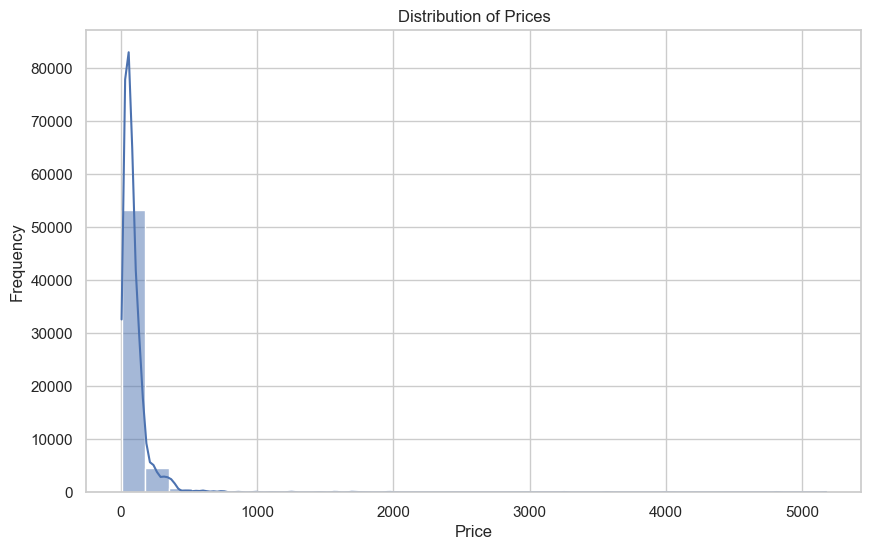

C:\Users\RTX\AppData\Local\Temp\ipykernel_17240\4142438196.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names.values, y=top_names.index, palette="viridis")


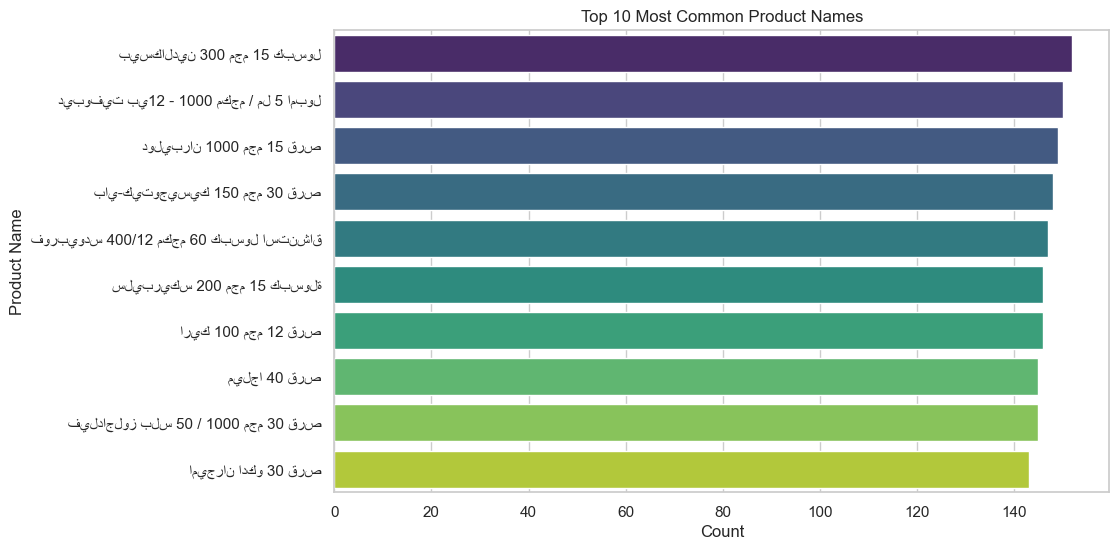

Final cleaned data saved successfully!


In [1]:
# Required Libraries
import pandas as pd
import re
from num2words import num2words
import matplotlib.pyplot as plt
import seaborn as sns

# 🟢 1️⃣ Load Data
def load_data():
    # Load the dataset
    file_path = "Product Matching Dataset.xlsx"
    xls = pd.ExcelFile(file_path)
    master = pd.read_excel(xls, sheet_name="Master File")
    data = pd.read_excel(xls, sheet_name="Dataset")
    return master, data

# 🟢 2️⃣ Clean and Prepare Data
def clean_and_prepare_data(master, data):
    # Define the cleaning function
    def clean_text(text):
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'[^a-z؀-ۿ0-9\s]', '', text)  # Remove special characters (Arabic supported)
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        text = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), text)  # Convert numbers to words
        # Expand common abbreviations (customize as needed)
        text = text.replace("مجم", "ميليجرام").replace("مل", "ميليلتر")
        return text

    # Apply cleaning to both datasets
    master['clean_name'] = master['product_name_ar'].apply(clean_text)
    data['clean_name'] = data['seller_item_name'].apply(clean_text)

    # Create a new DataFrame to store cleaned and expanded data
    new = pd.DataFrame(columns=['sku', 'name', 'price', 'input'])

    # Assign values from 'master' DataFrame
    new['sku'] = pd.concat([master['sku'], master['sku']], ignore_index=True)
    new['name'] = pd.concat([master['product_name'], master['product_name_ar']], ignore_index=True)
    new['price'] = pd.concat([master['price'], master['price']], ignore_index=True)

    # Expand rows for incremental input values
    expanded_rows = []
    for _, row in new.iterrows():
        words = row['name'].split()  # Split product name into words
        for i in range(1, len(words) + 1):  # Generate incremental input values
            expanded_rows.append({
                'sku': row['sku'],
                'name': row['name'],
                'price': row['price'],
                'input': ' '.join(words[:i])  # Take first i words
            })

    # Convert list to DataFrame
    y = pd.DataFrame(expanded_rows)

    # Rename columns in the dataset to match the structure
    data = data.rename(columns={
        "sku": "sku",
        "seller_item_name": "input",   # Seller name → Input
        "price": "price",
        "marketplace_product_name_ar": "name"  # Product name → Name
    })

    # Filter matching rows (sku & price must be the same)
    merged_data = data[['sku', 'name', 'price', 'input']]

    # Append to `y` (expanded DataFrame)
    maybe_final = pd.concat([y, merged_data], ignore_index=True)

    # Remove duplicates
    clean_data = maybe_final.drop_duplicates()

    return clean_data

# 🟢 3️⃣ Analyze Data
def analyze_data(clean_data):
    # Basic statistics
    print("Basic Statistics:")
    print(clean_data.describe())

    # Number of unique SKUs
    unique_skus = clean_data['sku'].nunique()
    print(f"\nNumber of unique SKUs: {unique_skus}")

    # Number of unique product names
    unique_names = clean_data['name'].nunique()
    print(f"Number of unique product names: {unique_names}")

    # Distribution of prices
    print("\nPrice Distribution:")
    print(clean_data['price'].value_counts().head())

    # Check for missing values
    print("\nMissing Values:")
    print(clean_data.isnull().sum())

    # Visualize the data
    sns.set(style="whitegrid")

    # Plot the distribution of prices
    plt.figure(figsize=(10, 6))
    sns.histplot(clean_data['price'], bins=30, kde=True)
    plt.title("Distribution of Prices")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

    # Plot the top 10 most common product names
    top_names = clean_data['name'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_names.values, y=top_names.index, palette="viridis")
    plt.title("Top 10 Most Common Product Names")
    plt.xlabel("Count")
    plt.ylabel("Product Name")
    plt.show()

# 🟢 4️⃣ Save Cleaned Data
def save_cleaned_data(clean_data):
    # Save the cleaned and analyzed data
    clean_data.to_excel("final_clean_data.xlsx", index=False)
    print("Final cleaned data saved successfully!")

# 🟢 Main Function
def main():
    # Step 1: Load data
    master, data = load_data()

    # Step 2: Clean and prepare data
    clean_data = clean_and_prepare_data(master, data)

    # Step 3: Analyze data
    analyze_data(clean_data)

    # Step 4: Save cleaned data
    save_cleaned_data(clean_data)

# Run the script
if __name__ == "__main__":
    main()

In [ ]:
# Required Libraries
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import re
from num2words import num2words
import numpy as np
import matplotlib.pyplot as plt

# 🟢 1️⃣ Load Data
def load_data():
    file_path = "Product Matching Dataset.xlsx"
    xls = pd.ExcelFile(file_path)
    master_df = pd.read_excel(xls, sheet_name="Master File")
    dataset_df = pd.read_excel(xls, sheet_name="Dataset")
    return master_df, dataset_df

# 🟢 2️⃣ Optimized Data Cleaning & Preprocessing
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z؀-ۿ0-9\s]', '', text)  # Remove special characters (Arabic supported)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), text)  # Convert numbers to words
    # Expand common abbreviations (customize as needed)
    text = text.replace("مجم", "ميليجرام").replace("مل", "ميليلتر")
    return text

def clean_data(master_df, dataset_df):
    dataset_df['clean_name'] = dataset_df['seller_item_name'].apply(clean_text)
    master_df['clean_name'] = master_df['product_name_ar'].apply(clean_text)
    return master_df, dataset_df

# 🟢 3️⃣ Feature Extraction using HashingVectorizer
def extract_features(master_df, dataset_df):
    vectorizer = HashingVectorizer(ngram_range=(1, 2), alternate_sign=False)
    X_master = vectorizer.fit_transform(master_df['clean_name'])
    X_dataset = vectorizer.transform(dataset_df['clean_name'])
    return vectorizer, X_master, X_dataset

# 🟢 4️⃣ Prepare Training Data
def prepare_training_data(X_dataset, dataset_df):
    X_train, X_test, y_train, y_test = train_test_split(X_dataset, dataset_df['sku'], test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# 🟢 5️⃣ Logistic Regression for Fast and Accurate Matching
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced')
    model.fit(X_train, y_train)
    return model

# 🟢 6️⃣ Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"🎯 Accuracy: {accuracy:.2%}")
    print(f"🎯 F1-Score: {f1:.2%}")
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))
    return y_pred

# 🟢 7️⃣ Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.show()

# 🟢 8️⃣ Save Model and Vectorizer
def save_model_and_vectorizer(model, vectorizer):
    joblib.dump(model, "optimized_product_matching_logreg.pkl")
    joblib.dump(vectorizer, "optimized_hashing_vectorizer.pkl")
    print("Model and vectorizer saved successfully!")

# 🟢 9️⃣ Product Search Function
def find_product(query, model, vectorizer, master_df):
    query_clean = clean_text(query)
    query_vector = vectorizer.transform([query_clean])
    match_sku = model.predict(query_vector)[0]
    return master_df[master_df['sku'] == match_sku]

# 🟢 Main Function
def main():
    # Step 1: Load data
    master_df, dataset_df = load_data()

    # Step 2: Clean and preprocess data
    master_df, dataset_df = clean_data(master_df, dataset_df)

    # Step 3: Extract features
    vectorizer, X_master, X_dataset = extract_features(master_df, dataset_df)

    # Step 4: Prepare training data
    X_train, X_test, y_train, y_test = prepare_training_data(X_dataset, dataset_df)

    # Step 5: Train Logistic Regression model
    model = train_model(X_train, y_train)

    # Step 6: Evaluate the model
    y_pred = evaluate_model(model, X_test, y_test)

    # Step 7: Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

    # Step 8: Save model and vectorizer
    save_model_and_vectorizer(model, vectorizer)

    # Step 9: Test product search function
    test_query = "استوهالت 40 مجم 14 كبسول"
    print("Search Result for:", test_query)
    print(find_product(test_query, model, vectorizer, master_df))

# Run the script
if __name__ == "__main__":
    main()

🎯 Accuracy: 93.86%
🎯 F1-Score: 94.36%
📊 Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.91      0.95        34
           5       0.97      0.97      0.97        33
           9       1.00      0.85      0.92        34
          10       1.00      0.97      0.98        32
          14       0.85      0.91      0.88        32
          15       0.96      0.96      0.96        24
          20       0.92      0.97      0.94        34
          22       1.00      0.95      0.97        37
          26       0.91      0.89      0.90        35
          28       1.00      1.00      1.00        41
          30       0.97      1.00      0.98        31
          34       1.00      0.96      0.98        23
          36       0.97      0.88      0.92        32
          45       1.00      0.97      0.99        34
          46       1.00      0.94      0.97        36
          48       1.00      0.92      0.96        25
          52     

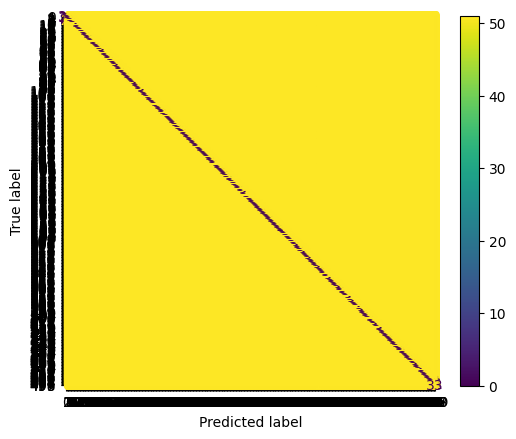

In [2]:
# Required Libraries
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import re
from num2words import num2words

# 🟢 1️⃣ Load Data
file_path = "Product Matching Dataset.xlsx"
xls = pd.ExcelFile(file_path)
master_df = pd.read_excel(xls, sheet_name="Master File")
dataset_df = pd.read_excel(xls, sheet_name="Dataset")

# 🟢 2️⃣ Optimized Data Cleaning & Preprocessing
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z؀-ۿ0-9\s]', '', text)  # Remove special characters (Arabic supported)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), text)  # Convert numbers to words
    # Expand common abbreviations (customize as needed)
    text = text.replace("مجم", "ميليجرام").replace("مل", "ميليلتر")
    return text

dataset_df['clean_name'] = dataset_df['seller_item_name'].apply(clean_text)
master_df['clean_name'] = master_df['product_name_ar'].apply(clean_text)

# 🟢 3️⃣ Feature Extraction using HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), alternate_sign=False, n_features=2**18)
X_master = vectorizer.fit_transform(master_df['clean_name'])
X_dataset = vectorizer.transform(dataset_df['clean_name'])

# 🟢 4️⃣ Prepare Training Data
X_train, X_test, y_train, y_test = train_test_split(X_dataset, dataset_df['sku'], test_size=0.2, random_state=42)

# 🟢 5️⃣ Logistic Regression for Fast and Accurate Matching
model = LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced')
model.fit(X_train, y_train)

# 🟢 6️⃣ Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"🎯 Accuracy: {accuracy:.2%}")
print(f"🎯 F1-Score: {f1:.2%}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# 🟢 7️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

# 🟢 8️⃣ Save Model and Vectorizer
joblib.dump(model, "optimized_product_matching_logreg.pkl")
joblib.dump(vectorizer, "optimized_hashing_vectorizer.pkl")

# 🟢 9️⃣ Product Search Function with Similarity Score
def find_product(query):
    query_clean = clean_text(query)
    query_vector = vectorizer.transform([query_clean])
    match_sku = model.predict(query_vector)[0]
    match_vector = vectorizer.transform([master_df.loc[master_df['sku'] == match_sku, 'clean_name'].values[0]])
    similarity_score = cosine_similarity(query_vector, match_vector)[0][0]
    confidence_level = model.predict_proba(query_vector).max()
    matched_product = master_df[master_df['sku'] == match_sku]
    return matched_product, similarity_score, confidence_level

# 🟢 Test Search
matched_product, similarity_score, confidence_level = find_product("استوهالت 40 مجم 14 كبسول")
print("🛒 Matched Product:\n", matched_product)
print(f"🎯 Similarity Score: {similarity_score:.2f}")
print(f"🎯 Confidence Level: {confidence_level:.2%}")

🎯 Accuracy: 93.91%
🎯 F1-Score: 94.44%
📊 Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.91      0.95        34
           5       0.97      0.97      0.97        33
           9       1.00      0.85      0.92        34
          10       1.00      0.97      0.98        32
          14       0.85      0.91      0.88        32
          15       0.96      0.96      0.96        24
          20       0.94      0.97      0.96        34
          22       1.00      0.95      0.97        37
          26       0.91      0.89      0.90        35
          28       1.00      1.00      1.00        41
          30       0.97      1.00      0.98        31
          34       1.00      0.96      0.98        23
          36       0.97      0.88      0.92        32
          45       1.00      0.97      0.99        34
          46       1.00      0.94      0.97        36
          48       1.00      0.92      0.96        25
          52     

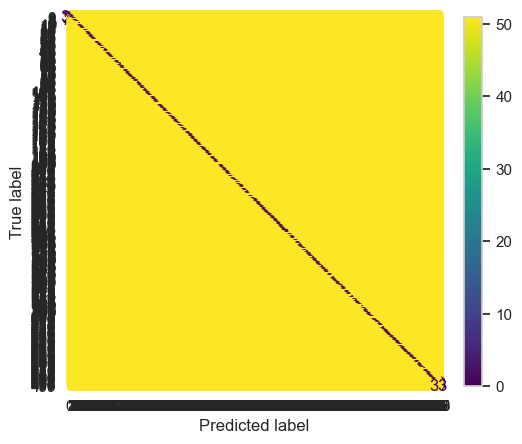

Model and vectorizer saved successfully!
Search Result for: استوهالت 40 مجم 14 كبسول
      sku           product_name           product_name_ar  price  \
260  1322  ESTOHALT 40 MG 14 CAP  استوهالت 40 مجم 14 كبسول   56.5   

                                   clean_name  
260  استوهالت أربعون ميليجرام أربعة عشر كبسول  


In [2]:
# Required Libraries
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import re
from num2words import num2words
import numpy as np
import matplotlib.pyplot as plt

# 🟢 1️⃣ Load Data
def load_data():
    file_path = "Product Matching Dataset.xlsx"
    xls = pd.ExcelFile(file_path)
    master_df = pd.read_excel(xls, sheet_name="Master File")
    dataset_df = pd.read_excel(xls, sheet_name="Dataset")
    return master_df, dataset_df

# 🟢 2️⃣ Optimized Data Cleaning & Preprocessing
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z؀-ۿ0-9\s]', '', text)  # Remove special characters (Arabic supported)
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), text)  # Convert numbers to words
    # Expand common abbreviations (customize as needed)
    text = text.replace("مجم", "ميليجرام").replace("مل", "ميليلتر")
    return text

def clean_data(master_df, dataset_df):
    dataset_df['clean_name'] = dataset_df['seller_item_name'].apply(clean_text)
    master_df['clean_name'] = master_df['product_name_ar'].apply(clean_text)
    return master_df, dataset_df

# 🟢 3️⃣ Feature Extraction using HashingVectorizer
def extract_features(master_df, dataset_df):
    vectorizer = HashingVectorizer(ngram_range=(1, 2), alternate_sign=False)
    X_master = vectorizer.fit_transform(master_df['clean_name'])
    X_dataset = vectorizer.transform(dataset_df['clean_name'])
    return vectorizer, X_master, X_dataset

# 🟢 4️⃣ Prepare Training Data
def prepare_training_data(X_dataset, dataset_df):
    X_train, X_test, y_train, y_test = train_test_split(X_dataset, dataset_df['sku'], test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# 🟢 5️⃣ Logistic Regression for Fast and Accurate Matching
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced')
    model.fit(X_train, y_train)
    return model

# 🟢 6️⃣ Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"🎯 Accuracy: {accuracy:.2%}")
    print(f"🎯 F1-Score: {f1:.2%}")
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))
    return y_pred

# 🟢 7️⃣ Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.show()

# 🟢 8️⃣ Save Model and Vectorizer
def save_model_and_vectorizer(model, vectorizer):
    joblib.dump(model, "optimized_product_matching_logreg.pkl")
    joblib.dump(vectorizer, "optimized_hashing_vectorizer.pkl")
    print("Model and vectorizer saved successfully!")

# 🟢 9️⃣ Product Search Function
def find_product(query, model, vectorizer, master_df):
    query_clean = clean_text(query)
    query_vector = vectorizer.transform([query_clean])
    match_sku = model.predict(query_vector)[0]
    return master_df[master_df['sku'] == match_sku]

# 🟢 Main Function
def main():
    # Step 1: Load data
    master_df, dataset_df = load_data()

    # Step 2: Clean and preprocess data
    master_df, dataset_df = clean_data(master_df, dataset_df)

    # Step 3: Extract features
    vectorizer, X_master, X_dataset = extract_features(master_df, dataset_df)

    # Step 4: Prepare training data
    X_train, X_test, y_train, y_test = prepare_training_data(X_dataset, dataset_df)

    # Step 5: Train Logistic Regression model
    model = train_model(X_train, y_train)

    # Step 6: Evaluate the model
    y_pred = evaluate_model(model, X_test, y_test)

    # Step 7: Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred)

    # Step 8: Save model and vectorizer
    save_model_and_vectorizer(model, vectorizer)

    # Step 9: Test product search function
    test_query = "استوهالت 40 مجم 14 كبسول"
    print("Search Result for:", test_query)
    print(find_product(test_query, model, vectorizer, master_df))

# Run the script
if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
import re
import joblib
import time
from num2words import num2words
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from rapidfuzz import fuzz

# Load Data
file_path = "Product Matching Dataset.xlsx"
xls = pd.ExcelFile(file_path)
master_df = pd.read_excel(xls, sheet_name="Master File")
data = pd.read_excel(xls, sheet_name="Dataset")

# Optimized Data Cleaning & Preprocessing
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z؀-ۿ0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), text)
    text = text.replace("مجم", "ميليجرام").replace("مل", "ميليلتر")
    return text

data['clean_name'] = data['seller_item_name'].apply(clean_text)
master_df['clean_name'] = master_df['product_name_ar'].apply(clean_text)

# Feature Extraction using HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), alternate_sign=False)
X_master = vectorizer.fit_transform(master_df['clean_name'])
X_dataset = vectorizer.transform(dataset_df['clean_name'])

# Prepare Training Data
X_train, X_test, y_train, y_test = train_test_split(X_dataset, dataset_df['sku'], test_size=0.2, random_state=42)

# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced')
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"🎯 Accuracy: {accuracy:.2%}")
print(f"🎯 F1-Score: {f1:.2%}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()

# Save Model and Vectorizer
joblib.dump(model, "optimized_product_matching_logreg.pkl")
joblib.dump(vectorizer, "optimized_hashing_vectorizer.pkl")

# Product Search with Similarity Score
def find_product(query):
    query_clean = clean_text(query)
    query_vector = vectorizer.transform([query_clean])
    
    similarities = cosine_similarity(query_vector, X_master).flatten()
    best_match_idx = np.argmax(similarities)
    best_match_score = similarities[best_match_idx]
    
    best_match_product = master_df.iloc[best_match_idx]
    return best_match_product, best_match_score

# Fuzzy Matching for Spelling Errors
def fuzzy_match(query, master_list):
    best_match = max(master_list, key=lambda x: fuzz.ratio(query, x))
    return best_match, fuzz.ratio(query, best_match)

# Rename columns from `data` to match `maybe_final`
# data = pd.read_excel("your_data_file.xlsx")  # Ensure 'data' is defined

data = data.rename(columns={
    "sku": "sku",
    "seller_item_name": "input",   # Seller name → Input
    "price": "price",
    "marketplace_product_name_ar": "name"  # Product name → Name
})

# Filter matching rows (sku & price must be the same)
merged_data = data[['sku', 'name', 'price', 'input']]

# Append to `maybe_final`
maybe_final = pd.concat([y, merged_data], ignore_index=True)

# Remove duplicates
clean_data = maybe_final.drop_duplicates()
# Save the updated file
clean_data.to_excel("clean_data.xlsx", index=False)

print("Data saved successfully!")

def get_similarity_and_confidence(new_item_name, model, vectorizer):
    new_item_vector = vectorizer.transform([new_item_name])
    predicted_sku = model.predict(new_item_vector)
    
    # Get distances to nearest neighbors
    distances, _ = model.kneighbors(new_item_vector)
    similarity_score = 1 - distances.min()

    confidence_level = min(model.predict_proba(new_item_vector)[0].max(), similarity_score)

    if confidence_level > 0.95:
        note = "High"
    elif confidence_level > 0.75 and confidence_level <= 0.95:
        note = "Medium"
    else:
        note = "Low"
  
    return predicted_sku[0], similarity_score, confidence_level, note

def process_file(file_path):
    try:
        df = pd.read_excel(file_path)
        
        if 'input' not in df.columns:
            raise ValueError("The input column is missing in the Excel file.")
        
        df['price'] = df['price'].astype(int)
        df['input'] = df['input'].apply(clean_text)
        df['combined_features'] = df['input'] + ' ' + df['price'].astype(str)
        
        # Compute predictions and similarity metrics
        results = df['combined_features'].apply(lambda x: get_similarity_and_confidence(x, model, vectorizer))
        df[['Predicted SKU', 'Similarity Score', 'Confidence Level', ' Note']] = pd.DataFrame(results.tolist(), index=df.index)
        
        output_file = "predictions_master.xlsx"
        df.to_excel(output_file, index=False)
        print(f"Predictions saved as {output_file}")
    except Exception as e:
        print(f"Error: {e}")

# Process new file
file_path = "new_master.xlsx"
process_file(file_path)


🎯 Accuracy: 93.91%
🎯 F1-Score: 94.44%
📊 Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.91      0.95        34
           5       0.97      0.97      0.97        33
           9       1.00      0.85      0.92        34
          10       1.00      0.97      0.98        32
          14       0.85      0.91      0.88        32
          15       0.96      0.96      0.96        24
          20       0.94      0.97      0.96        34
          22       1.00      0.95      0.97        37
          26       0.91      0.89      0.90        35
          28       1.00      1.00      1.00        41
          30       0.97      1.00      0.98        31
          34       1.00      0.96      0.98        23
          36       0.97      0.88      0.92        32
          45       1.00      0.97      0.99        34
          46       1.00      0.94      0.97        36
          48       1.00      0.92      0.96        25
          52     

NameError: name 'y' is not defined

Error in callback <function _draw_all_if_interactive at 0x000001E148A27920> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 